# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


In this notebook, we will perform Exploratory Data Analysis and Feature Engineering.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


## Setup

We will import the following libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
path = "../../Data_Collecting&Wrangling/Wrangling/dataset_part_2.csv"
df=pd.read_csv(path)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Customer,Payload,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,SpaceX,Dragon Spacecraft Qualification Unit,1
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,NASA,Dragon,1
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,NASA,SpaceX CRS-2,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,MDA,CASSIOPE,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,SES,SES-8,1


## Exploratory Data Analysis (EDA)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


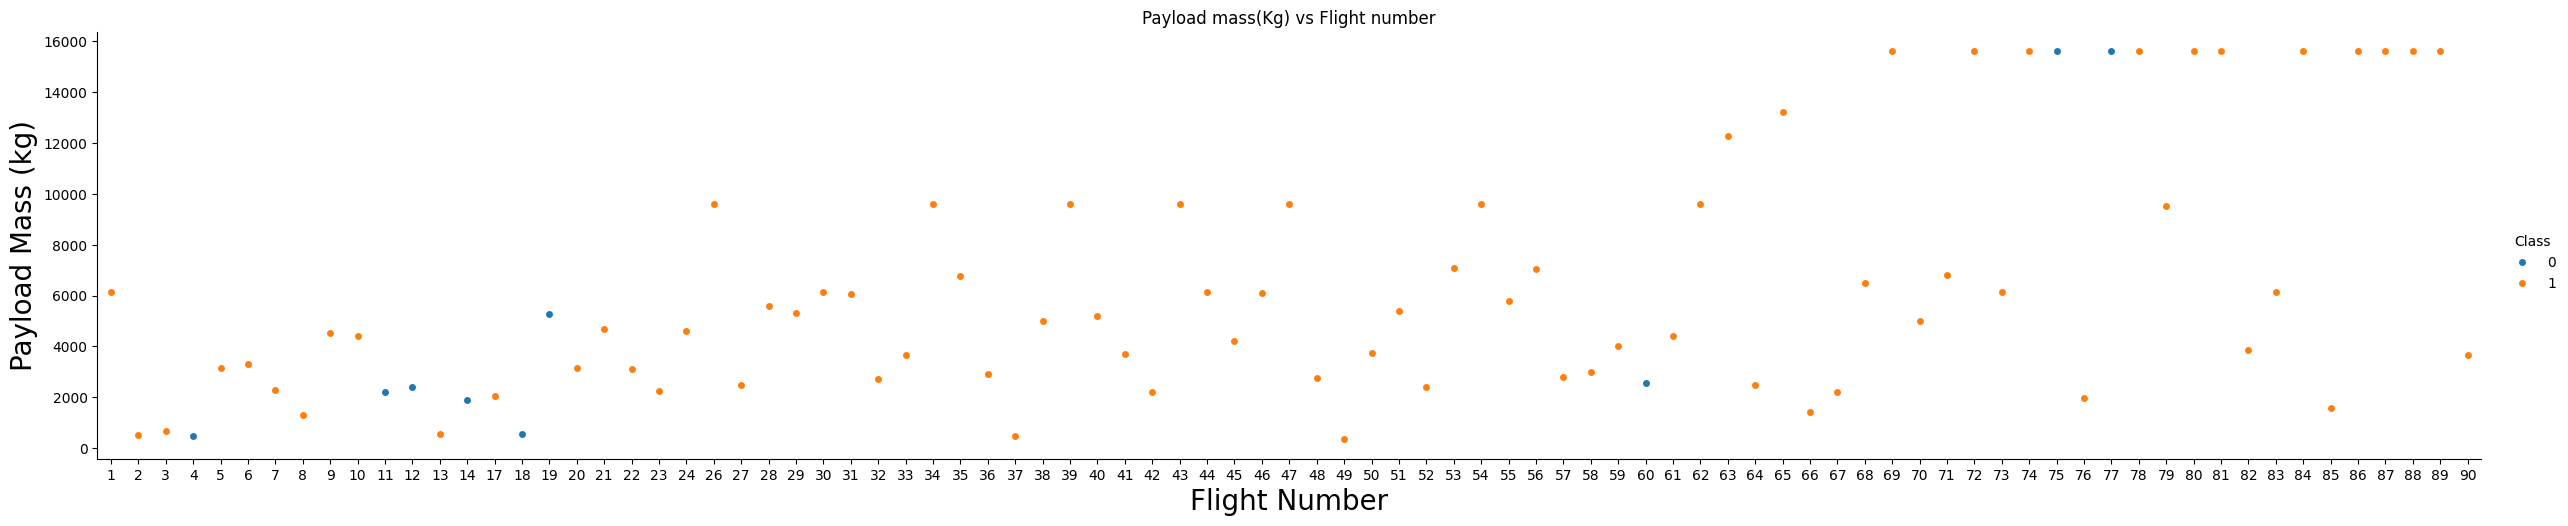

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.title('Payload mass(Kg) vs Flight number')

plt.show()

We can get `Success rate` for each launch site

In [6]:
df[['LaunchSite', 'Class']].groupby('LaunchSite', as_index=False).mean()

,LaunchSite,Class
0,CCSFS SLC 40,0.884615
1,KSC LC 39A,0.954545
2,VAFB SLC 4E,0.846154


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


In [7]:
df[['LaunchSite', 'FlightNumber', 'Class']].groupby(['LaunchSite', 'Class'], as_index=False).count()

,LaunchSite,Class,FlightNumber
0,CCSFS SLC 40,0,6
1,CCSFS SLC 40,1,46
2,KSC LC 39A,0,1
3,KSC LC 39A,1,21
4,VAFB SLC 4E,0,2
5,VAFB SLC 4E,1,11


Now we want to visualize the relationship between `Flight Number` and `Launch Site`


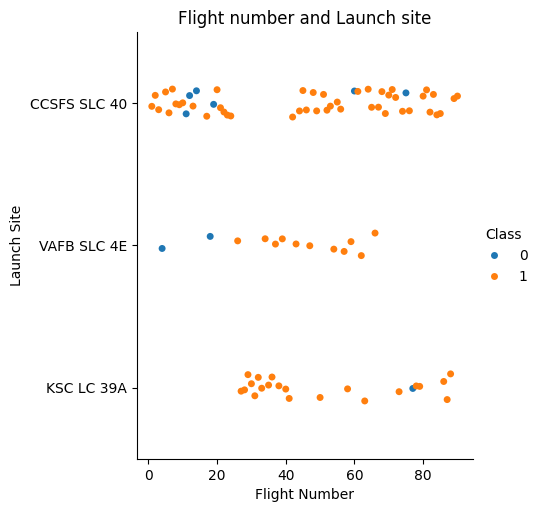

In [8]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight number and Launch site')
plt.show()

In [9]:
#mean of Class(success rate) and PayloadMass in each LaunchSite
df[['PayloadMass', 'Class', 'LaunchSite']].groupby('LaunchSite', as_index=False).mean()

,LaunchSite,PayloadMass,Class
0,CCSFS SLC 40,5640.446018,0.884615
1,KSC LC 39A,7644.504332,0.954545
2,VAFB SLC 4E,5919.461538,0.846154


We also want to observe if there is any relationship between `launch sites` and their `payload mass`.


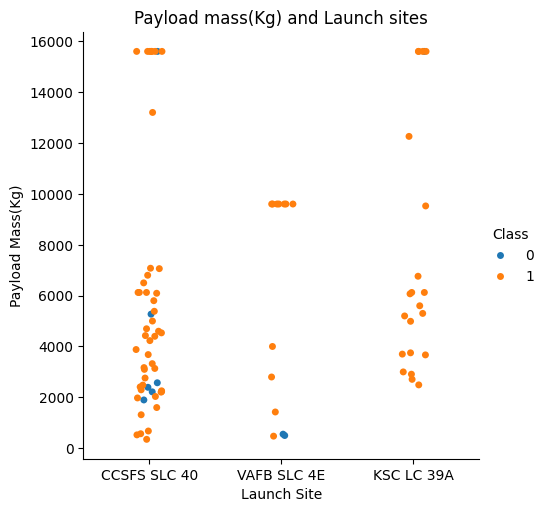

In [10]:
# Visualize the relationship between Payload and Launch Site
sns.catplot(data=df, x='LaunchSite', y='PayloadMass', hue='Class')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass(Kg)')
plt.title('Payload mass(Kg) and Launch sites')

plt.show()

Now if you observe Payload Vs. Launch Site scatter plot you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


Next, we want to visually check if there are any relationship between `success rate` and `orbit type`.


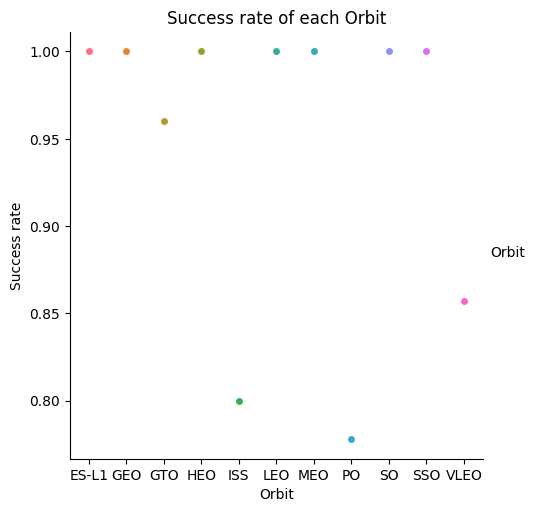

In [11]:
df_mean = df[['Orbit', 'Class']].groupby('Orbit', as_index=False).mean()
sns.catplot(data=df_mean, x='Orbit', y='Class', hue='Orbit')
plt.ylabel('Success rate')
plt.xlabel('Orbit')
# plt.ylim(0,)
plt.title('Success rate of each Orbit')
plt.show()

Let's create a `bar chart` for the `sucess rate` of each orbit


In [15]:
df_mean

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.960000
3,HEO,1.000000
4,ISS,0.800000
5,LEO,1.000000
6,MEO,1.000000
7,PO,0.777778
8,SO,1.000000
9,SSO,1.000000


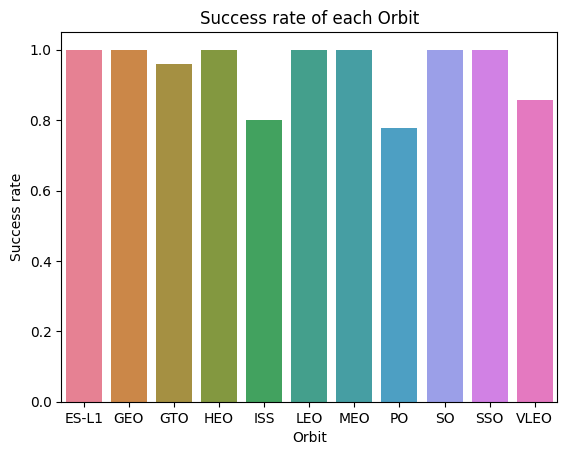

In [17]:
ax = sns.barplot(data=df_mean, x='Orbit', y='Class', hue='Orbit')
plt.title('Success rate of each Orbit')
plt.ylabel('Success rate')
plt.xlabel('Orbit')
plt.show()

By Analyzing the ploted bar chart we find that **SSO, SO, HEO, GEO, ES-L1, VLEO** have highest succes rate.


For each orbit, we want to see if there is any relationship between `FlightNumber` and `Orbit type`.


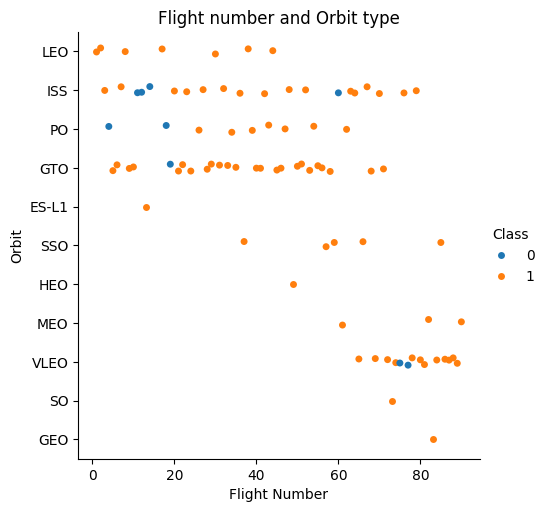

In [18]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.title('Flight number and Orbit type')
plt.ylabel('Orbit')
plt.xlabel('Flight Number')
plt.show()

You should see that in the `LEO orbit` the Success appears related to `the number of flights`; on the other hand, there seems to be no relationship between flight number when in `GTO orbit`.


Similarly, we can plot the `Payload vs. Orbit` scatter plot to reveal the relationship between `Payload and Orbit type`


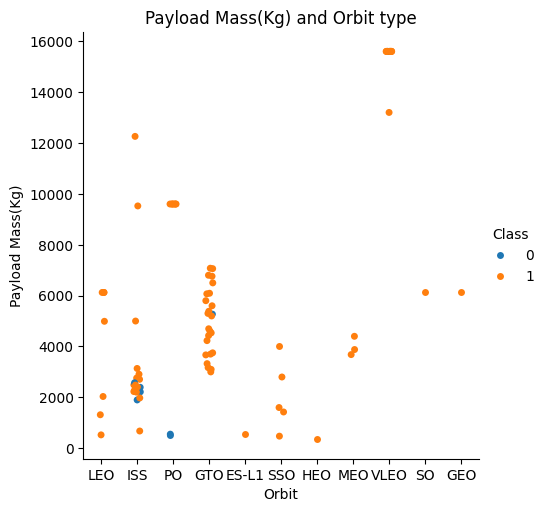

In [19]:
sns.catplot(data=df, x='Orbit', y='PayloadMass', hue='Class')
plt.title('Payload Mass(Kg) and Orbit type')
plt.xlabel('Orbit')
plt.ylabel('Payload Mass(Kg)')
plt.show()

In [20]:
df[['Orbit','Class']][df['PayloadMass']>10000].groupby(['Orbit'], as_index=False).mean()

,Orbit,Class
0,ISS,1.000000
1,VLEO,0.857143


With `heavy payloads` the successful landing or positive landing rate are more for `ISS`.

We can plot a line chart with x axis to be <code>Year</code> and y axis to be `average success rate`, to get the average launch success trend to visualize the launch success yearly trend.


The function to get the year from the date:


In [21]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['YDate'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Customer,Payload,Class,YDate
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,SpaceX,Dragon Spacecraft Qualification Unit,1,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,NASA,Dragon,1,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,NASA,SpaceX CRS-2,1,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,MDA,CASSIOPE,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,SES,SES-8,1,2013


Now we plot a line chart with x axis to be the extracted year and y axis to be the success rate to see trend of success_rate yearly

In [23]:
df_mean_year

,YDate,Success_Rate
0,2010,1.000000
1,2012,1.000000
2,2013,0.666667
3,2014,0.833333
4,2015,0.500000
5,2016,0.714286
6,2017,1.000000
7,2018,0.944444
8,2019,1.000000
9,2020,0.894737


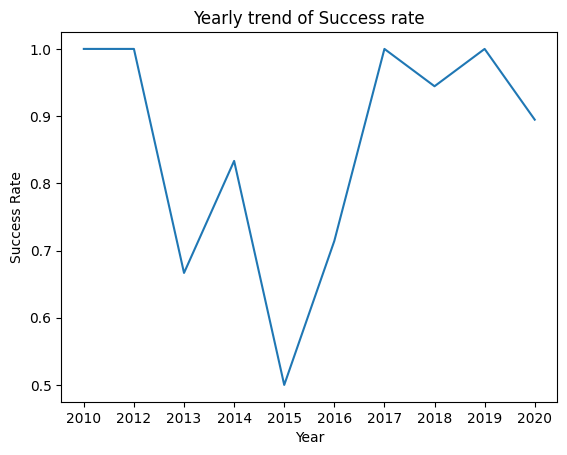

In [22]:
df_mean_year = df[['YDate', 'Class']].groupby('YDate', as_index=False).mean()
df_mean_year.columns = ['YDate', 'Success_Rate']
plt.plot(df_mean_year['YDate'],df_mean_year['Success_Rate'])
plt.ylabel('Success Rate')
plt.xlabel('Year')
plt.title('Yearly trend of Success rate')
plt.show()

you can observe that the sucess rate since 2015 kept increasing till 2020


## Features Engineering


By now, we obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future.


In [25]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Customer',
       'Payload', 'Class', 'YDate'],
      dtype='object')

In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,1.0,0,B1004


We have to change categorical variable to numeric variable to use in predictive model

In [28]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'Serial']])
features_one_hot = pd.concat([features, features_one_hot], axis=1)
features_one_hot.drop(['Orbit', 'LaunchSite', 'Serial'], axis=1, inplace=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [29]:
features_one_hot = features_one_hot.astype('float64')

In [30]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we can see type of all columns change to `float64`

In [31]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 72, dtype: object

We can now export it to a <b>CSV</b> for the next section we use our dataset for learning our predictive algorithmes.


In [32]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Author

<center>Moein (mrpintime)</center>